## Social Media Data Analytics: Facebook Campaign Performance Analysis

**Project Overview:**
This project analyzes the Facebook advertising campaign run by 365 Data Science to promote and sell one of their online courses. Using Python and standard data-science libraries, the analysis examines campaign structure, audience targeting, ad creative performance, and conversion funnels to measure how effectively the campaign turned impressions into course sales.

The work covers data cleaning, exploratory data analysis (EDA), visualization, and performance evaluation across core marketing KPIs — impressions, reach, clicks, CTR, conversions, conversion rate, cost per click (CPC), cost per acquisition (CPA), return on ad spend (ROAS), CPM, and frequency.  The project identifies which audiences, creatives, placements, and bid strategies drove the most cost-efficient enrollments and highlights opportunities to increase ROI.

**Objectives:**

Analyze Facebook campaign data using Python

Identify high-performing and low-performing campaigns through A/B testing

Measure user engagement and conversion effectiveness

Visualize key marketing metrics

Provide actionable insights for improving future campaigns

**Tools & Libraries Used:**

Python

Pandas

NumPy

Matplotlib

Seaborn

**Step 1: Examining the dataset**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/7.1+365DS+Adsets.csv')
df.head()

,Reporting Starts,Reporting Ends,Ad Set Name,Amount Spent,Results,Result indicator,CPR,Reach,Impressions,Frequency,CPM,CPC,CTR (all),Link Clicks,Landing Page Views
0,20/5/2022,31/5/2022,T1 - Cold - LLA - Promo May,332.65,2,actions:offsite_conversion.fb_pixel_purchase,166.3250,6032,12594,2.087865,26.413371,2.294138,2.207400,145,89
1,20/5/2022,31/5/2022,T1 - Cold - DT - Promo May,915.00,15,actions:offsite_conversion.fb_pixel_purchase,61.0000,18900,42510,2.249206,21.524347,2.636888,1.587862,347,215
2,20/5/2022,31/5/2022,T2 - Cold - LLA - Promo May,327.77,4,actions:offsite_conversion.fb_pixel_purchase,81.9425,34743,61268,1.763463,5.349775,0.947312,1.237187,346,220
3,20/5/2022,31/5/2022,T2 - Cold - DT - Promo May,297.38,0,NaN,NaN,45001,65880,1.463967,4.513965,0.788806,1.220401,377,225
4,20/5/2022,31/5/2022,T3 - Cold - LLA - Promo May,291.45,4,actions:offsite_conversion.fb_pixel_purchase,72.8625,69040,147600,2.137891,1.974594,0.464092,1.115854,628,372


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Reporting Starts    13 non-null     object 
 1   Reporting Ends      13 non-null     object 
 2   Ad Set Name         13 non-null     object 
 3   Amount Spent        13 non-null     float64
 4   Results             13 non-null     int64  
 5   Result indicator    11 non-null     object 
 6   CPR                 11 non-null     float64
 7   Reach               13 non-null     int64  
 8   Impressions         13 non-null     int64  
 9   Frequency           13 non-null     float64
 10  CPM                 13 non-null     float64
 11  CPC                 13 non-null     float64
 12  CTR (all)           13 non-null     float64
 13  Link Clicks         13 non-null     int64  
 14  Landing Page Views  13 non-null     int64  
dtypes: float64(6), int64(5), object(4)
memory usage: 1.7+ KB


**Step 2: Campaign Highlights**

In [ ]:
df[["Reach","Impressions","Link Clicks","Landing Page Views","Results","Amount Spent"]].sum()

,0
Reach,453534.00
Impressions,1136052.00
Link Clicks,5589.00
Landing Page Views,2985.00
Results,83.00
Amount Spent,4362.12


**Campaign Highlights**

The campaign reached around 450K unique people.
Approx 1.1 million impressions.
Each person saw the ad around 2.5 times.
Approx 5.6K link clicks and 2.9K landing page views.
Total of 83 results.
Spent 4,362 EUR.

CPM (Cost per 1000 Impressions)

$\displaystyle \frac{\text{Total Amount Spent}}{\text{Impressions}} \times 1000$

In [ ]:
((df['Amount Spent']/df['Impressions'])*1000).mean()

np.float64(6.552931634584924)

In [ ]:
df.head()

,Reporting Starts,Reporting Ends,Ad Set Name,Amount Spent,Results,Result indicator,CPR,Reach,Impressions,Frequency,CPM,CPC,CTR (all),Link Clicks,Landing Page Views
0,20/5/2022,31/5/2022,T1 - Cold - LLA - Promo May,332.65,2,actions:offsite_conversion.fb_pixel_purchase,166.3250,6032,12594,2.087865,26.413371,2.294138,2.207400,145,89
1,20/5/2022,31/5/2022,T1 - Cold - DT - Promo May,915.00,15,actions:offsite_conversion.fb_pixel_purchase,61.0000,18900,42510,2.249206,21.524347,2.636888,1.587862,347,215
2,20/5/2022,31/5/2022,T2 - Cold - LLA - Promo May,327.77,4,actions:offsite_conversion.fb_pixel_purchase,81.9425,34743,61268,1.763463,5.349775,0.947312,1.237187,346,220
3,20/5/2022,31/5/2022,T2 - Cold - DT - Promo May,297.38,0,NaN,NaN,45001,65880,1.463967,4.513965,0.788806,1.220401,377,225
4,20/5/2022,31/5/2022,T3 - Cold - LLA - Promo May,291.45,4,actions:offsite_conversion.fb_pixel_purchase,72.8625,69040,147600,2.137891,1.974594,0.464092,1.115854,628,372


In [ ]:
df['CPM'].mean()

np.float64(6.552931538461538)

### Click-Through-Rate

$\displaystyle \frac{\text{Total Link Clicks}}{\text{Total Impressions}} \times 100$

In [ ]:
df.head(2)

,Reporting Starts,Reporting Ends,Ad Set Name,Amount Spent,Results,Result indicator,CPR,Reach,Impressions,Frequency,CPM,CPC,CTR (all),Link Clicks,Landing Page Views
0,20/5/2022,31/5/2022,T1 - Cold - LLA - Promo May,332.65,2,actions:offsite_conversion.fb_pixel_purchase,166.325,6032,12594,2.087865,26.413371,2.294138,2.207400,145,89
1,20/5/2022,31/5/2022,T1 - Cold - DT - Promo May,915.00,15,actions:offsite_conversion.fb_pixel_purchase,61.000,18900,42510,2.249206,21.524347,2.636888,1.587862,347,215


In [ ]:
((df['Link Clicks']/df['Impressions'])*100).mean()

np.float64(0.5665608095472924)

In [ ]:
df['CTR (all)'].mean()

np.float64(1.2442086153846152)

### Cost Per Result

$\displaystyle \frac{\text{Total Amount Spent}}{\text{Total Results}}$


In [ ]:
df.head(1)

,Reporting Starts,Reporting Ends,Ad Set Name,Amount Spent,Results,Result indicator,CPR,Reach,Impressions,Frequency,CPM,CPC,CTR (all),Link Clicks,Landing Page Views
0,20/5/2022,31/5/2022,T1 - Cold - LLA - Promo May,332.65,2,actions:offsite_conversion.fb_pixel_purchase,166.325,6032,12594,2.087865,26.413371,2.294138,2.2074,145,89


In [ ]:
(df['Amount Spent']/df['Results']).mean()

np.float64(inf)

In [ ]:
df_not_zero = df[df['Results']!=0]

In [ ]:
(df_not_zero['Amount Spent']/df_not_zero['Results']).mean()

np.float64(63.75379220779221)

In [ ]:
df['CPR'].mean()

np.float64(63.75379220818183)

Step 3: Ad Set Overview

In [ ]:
df['Ad Set Name'].unique()

array(['T1 - Cold - LLA - Promo May', 'T1 - Cold - DT - Promo May',
       'T2 - Cold - LLA - Promo May', 'T2 - Cold - DT - Promo May',
       'T3 - Cold - LLA - Promo May', 'T3 - Cold - DT - Promo May',
       'T4 - Cold - DT - Promo May', 'T4 - Cold - LLA - Promo May',
       'Warm - CRSL', 'Warm - Videos', 'HOT - Last day',
       'HOT - Last chance & crsl', 'HOT - Discount'], dtype=object)

Hot, Warm, and Cold Ad Sets

In [ ]:
def categorize_ad_set(ad_set_name):
    if 'Warm' in ad_set_name:
        return 'Warm'
    elif 'HOT' in ad_set_name:
        return 'Hot'
    else:
        return 'Cold'

df['Category'] = df['Ad Set Name'].apply(categorize_ad_set)
df.head()

,Reporting Starts,Reporting Ends,Ad Set Name,Amount Spent,Results,Result indicator,CPR,Reach,Impressions,Frequency,CPM,CPC,CTR (all),Link Clicks,Landing Page Views,Category
0,20/5/2022,31/5/2022,T1 - Cold - LLA - Promo May,332.65,2,actions:offsite_conversion.fb_pixel_purchase,166.3250,6032,12594,2.087865,26.413371,2.294138,2.207400,145,89,Cold
1,20/5/2022,31/5/2022,T1 - Cold - DT - Promo May,915.00,15,actions:offsite_conversion.fb_pixel_purchase,61.0000,18900,42510,2.249206,21.524347,2.636888,1.587862,347,215,Cold
2,20/5/2022,31/5/2022,T2 - Cold - LLA - Promo May,327.77,4,actions:offsite_conversion.fb_pixel_purchase,81.9425,34743,61268,1.763463,5.349775,0.947312,1.237187,346,220,Cold
3,20/5/2022,31/5/2022,T2 - Cold - DT - Promo May,297.38,0,NaN,NaN,45001,65880,1.463967,4.513965,0.788806,1.220401,377,225,Cold
4,20/5/2022,31/5/2022,T3 - Cold - LLA - Promo May,291.45,4,actions:offsite_conversion.fb_pixel_purchase,72.8625,69040,147600,2.137891,1.974594,0.464092,1.115854,628,372,Cold


In [ ]:
results = df.groupby('Category').agg({'Reach':'mean','Impressions':'mean',
                                    'CTR (all)':'mean','Results':'mean',
                                    'CPR':'mean'})

results

,Reach,Impressions,CTR (all),Results,CPR
Category,,,,,
Cold,44435.375000,79417.500000,1.370799,4.000000,80.352667
Hot,11195.666667,58889.666667,1.034126,10.333333,38.851667
Warm,32232.000000,162021.500000,1.052970,10.000000,51.310357


Looalike vs Detailed Targeting

In [ ]:
df['Ad Set Name'].unique()

array(['T1 - Cold - LLA - Promo May', 'T1 - Cold - DT - Promo May',
       'T2 - Cold - LLA - Promo May', 'T2 - Cold - DT - Promo May',
       'T3 - Cold - LLA - Promo May', 'T3 - Cold - DT - Promo May',
       'T4 - Cold - DT - Promo May', 'T4 - Cold - LLA - Promo May',
       'Warm - CRSL', 'Warm - Videos', 'HOT - Last day',
       'HOT - Last chance & crsl', 'HOT - Discount'], dtype=object)

In [ ]:
def categorize_ad_set_2(ad_set_name):
    if('DT' in ad_set_name):
        return 'Detailed Targeting'
    elif('LLA' in ad_set_name):
        return 'Lookalike Audience'
    else:
        return 'Other'

df['Subcategory'] = df['Ad Set Name'].apply(categorize_ad_set_2)

In [ ]:
df_cold = df[df['Category']=='Cold']

In [ ]:
df_cold = df_cold.groupby('Subcategory').agg({'Reach':'mean','Impressions':'mean',
                                    'CTR (all)':'mean','Results':'mean',
                                    'CPR':'mean'})

df_cold

,Reach,Impressions,CTR (all),Results,CPR
Subcategory,,,,,
Detailed Targeting,34033.25,53142.25,1.351996,4.25,53.2550
Lookalike Audience,54837.50,105692.75,1.389602,3.75,93.9015


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_transformed = df_cold.reset_index().melt('Subcategory')
df_transformed

,Subcategory,variable,value
0,Detailed Targeting,Reach,34033.250000
1,Lookalike Audience,Reach,54837.500000
2,Detailed Targeting,Impressions,53142.250000
3,Lookalike Audience,Impressions,105692.750000
4,Detailed Targeting,CTR (all),1.351996
5,Lookalike Audience,CTR (all),1.389602
6,Detailed Targeting,Results,4.250000
7,Lookalike Audience,Results,3.750000
8,Detailed Targeting,CPR,53.255000
9,Lookalike Audience,CPR,93.901500


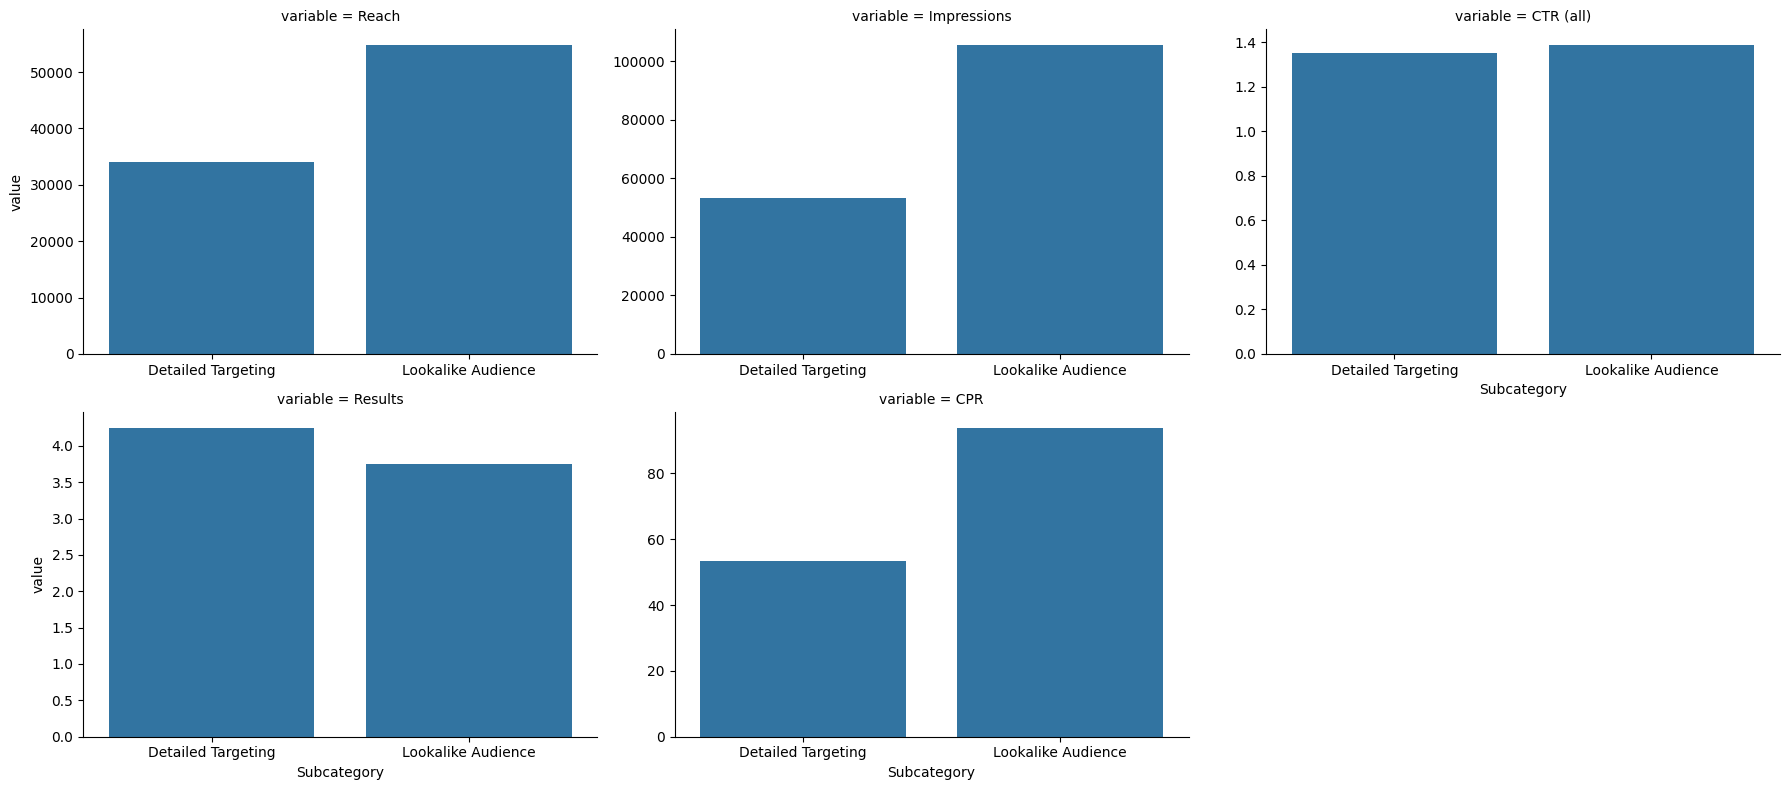

In [ ]:
viz = sns.FacetGrid(df_transformed, col='variable', col_wrap=3, sharex=False,
                   sharey=False, height=4, aspect=1.5)

viz.map(sns.barplot, 'Subcategory', 'value', order=df_cold.reset_index()['Subcategory'])

plt.show()

Step 4: Detailed Ad Set Analysis

Hot

In [ ]:
df_hot = df[df['Category']=='Hot']
df_hot = df_hot.reset_index()

Top-Funnel Metrics

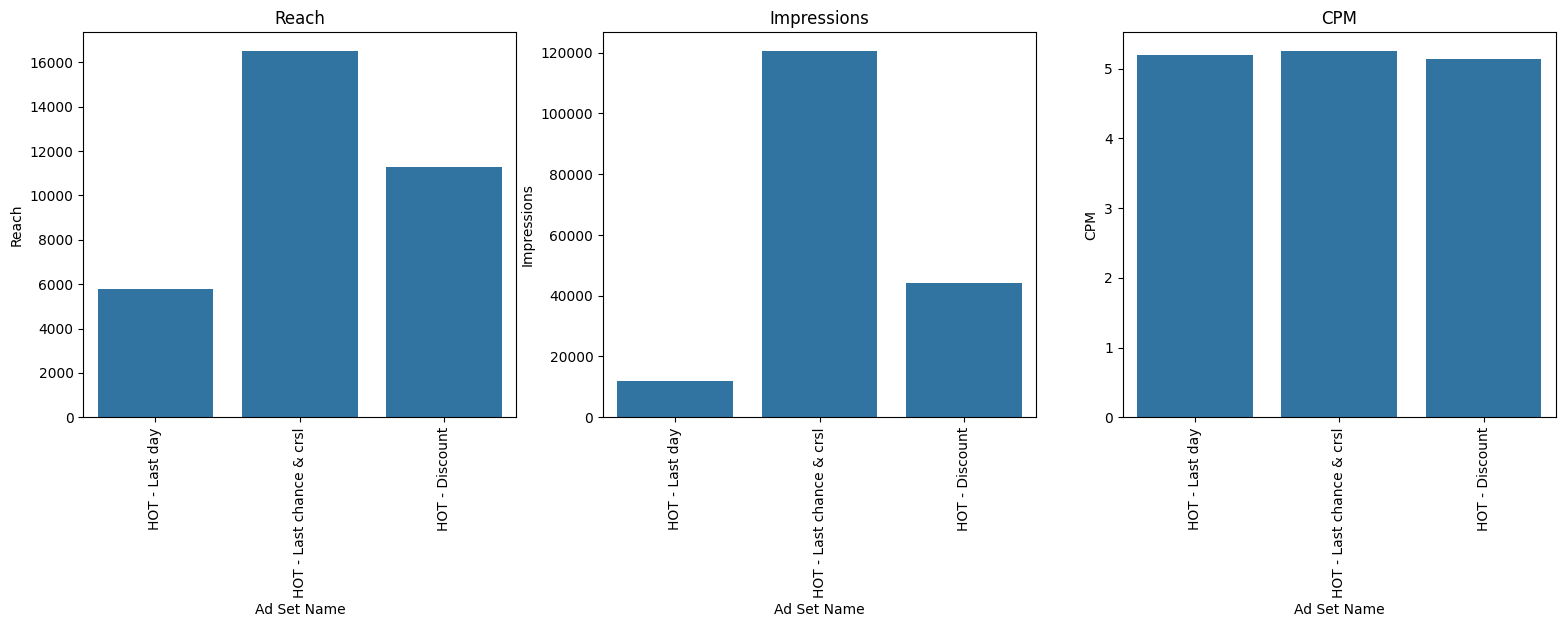

In [ ]:
def top_funnel_metrics(df):
    fig, axs = plt.subplots(1, 3, figsize=(19,5))

    sns.barplot(x='Ad Set Name', y='Reach', data=df, ax=axs[0])
    axs[0].set_title('Reach')

    sns.barplot(x='Ad Set Name', y='Impressions', data=df, ax=axs[1])
    axs[1].set_title('Impressions')

    sns.barplot(x='Ad Set Name', y='CPM', data=df, ax=axs[2])
    axs[2].set_title('CPM')

    for ax in axs:
        for label in ax.get_xticklabels():
            label.set_rotation(90)

    plt.show()

top_funnel_metrics(df_hot)

Mid-Funnel Metrics

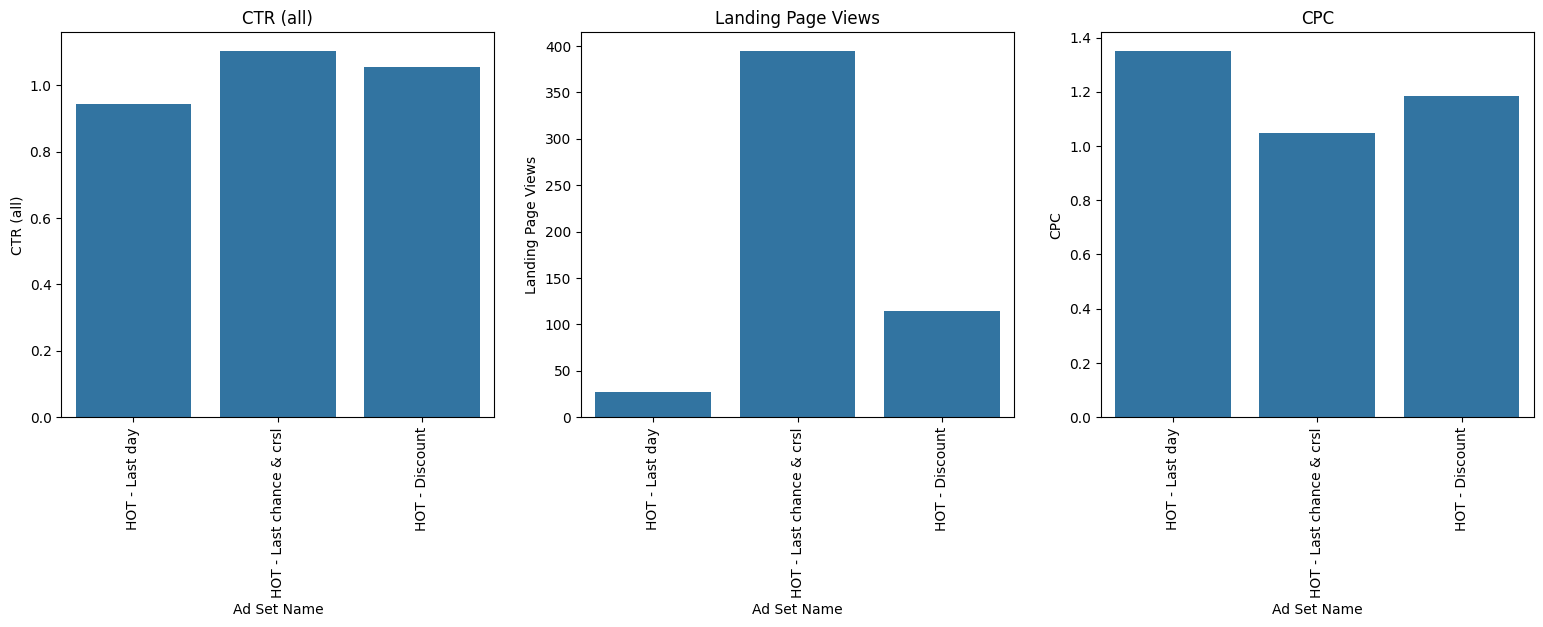

In [ ]:
def mid_funnel_metrics(df):
    fig, axs = plt.subplots(1, 3, figsize=(19,5))

    sns.barplot(x='Ad Set Name', y='CTR (all)', data=df, ax=axs[0])
    axs[0].set_title('CTR (all)')

    sns.barplot(x='Ad Set Name', y='Landing Page Views', data=df, ax=axs[1])
    axs[1].set_title('Landing Page Views')

    sns.barplot(x='Ad Set Name', y='CPC', data=df, ax=axs[2])
    axs[2].set_title('CPC')

    for ax in axs:
        for label in ax.get_xticklabels():
            label.set_rotation(90)

    plt.show()

mid_funnel_metrics(df_hot)

Bottom-Funnel Metrics

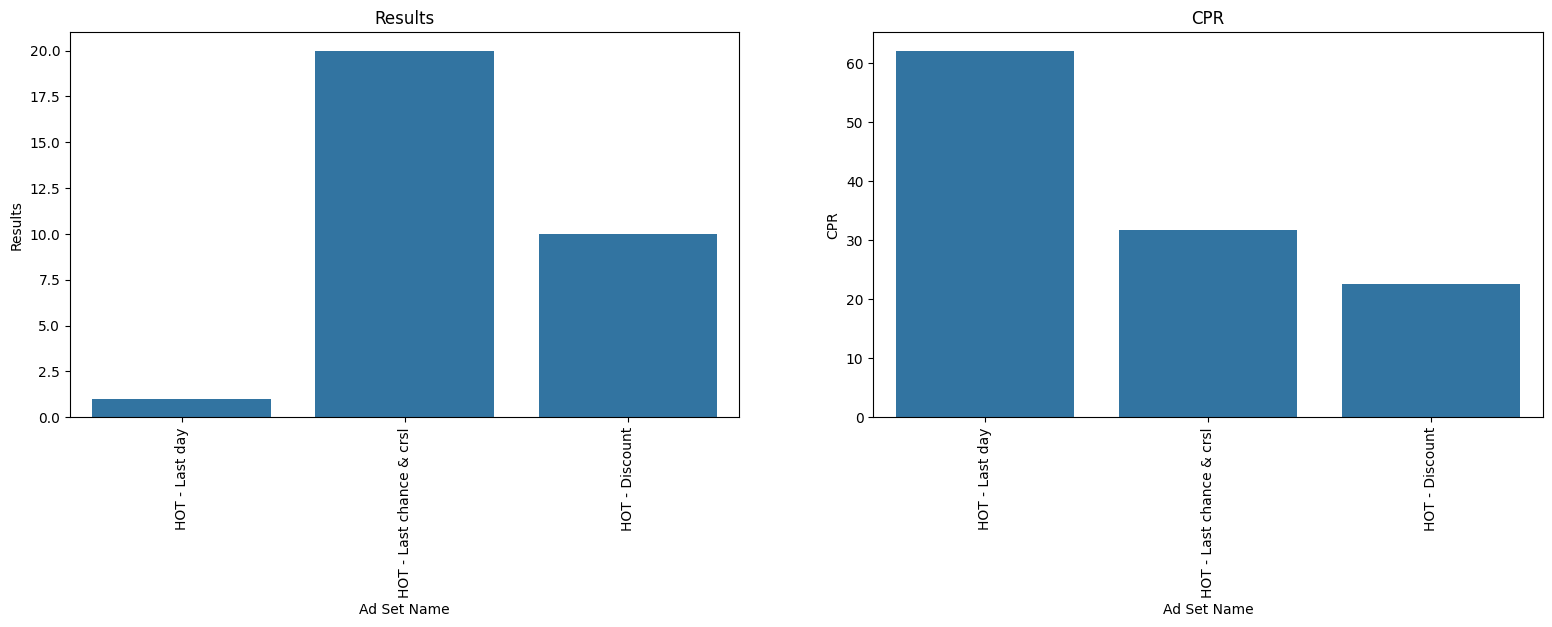

In [ ]:
def bottom_funnel_metrics(df):
    fig, axs = plt.subplots(1, 2, figsize=(19,5))

    sns.barplot(x='Ad Set Name', y='Results', data=df, ax=axs[0])
    axs[0].set_title('Results')

    sns.barplot(x='Ad Set Name', y='CPR', data=df, ax=axs[1])
    axs[1].set_title('CPR')

    for ax in axs:
        for label in ax.get_xticklabels():
            label.set_rotation(90)

    plt.show()

bottom_funnel_metrics(df_hot)

<Axes: xlabel='Ad Set Name', ylabel='Amount Spent'>

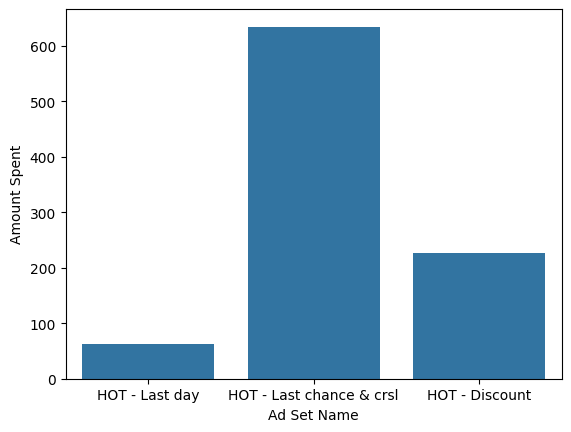

In [ ]:
sns.barplot(x='Ad Set Name', y='Amount Spent', data=df_hot)

Warm

In [ ]:
df_warm = df[df['Category']=='Warm']
df_warm = df_warm.reset_index()

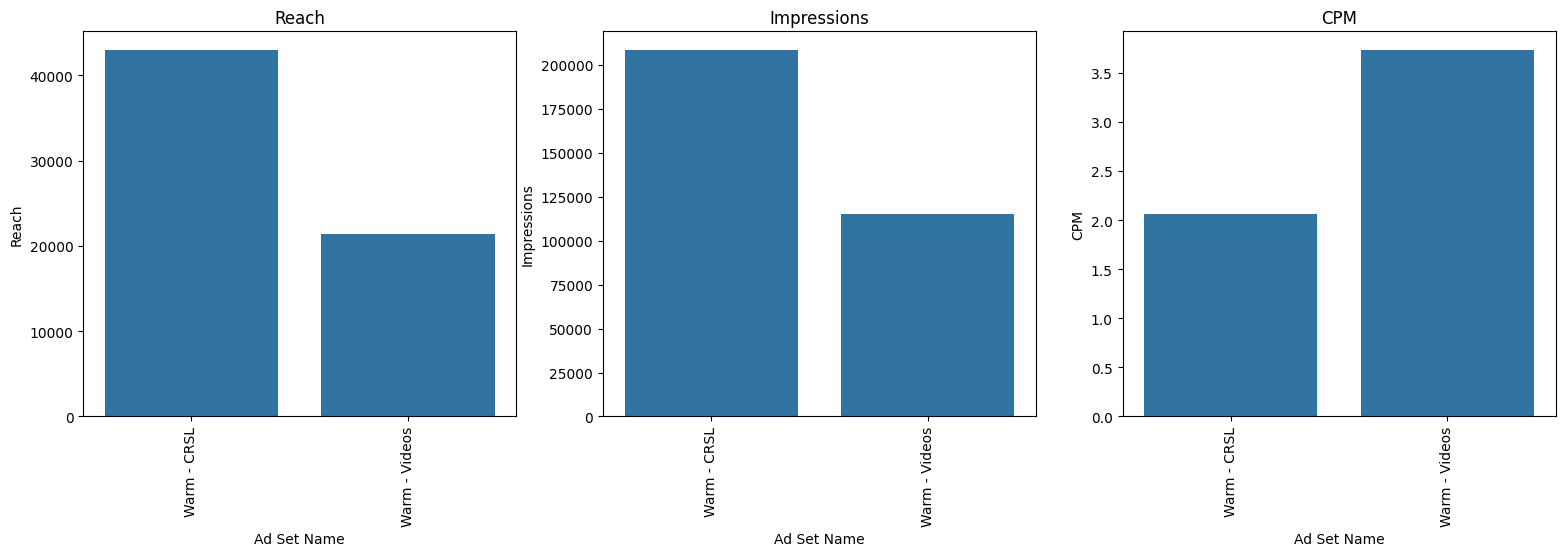

In [ ]:
top_funnel_metrics(df_warm)

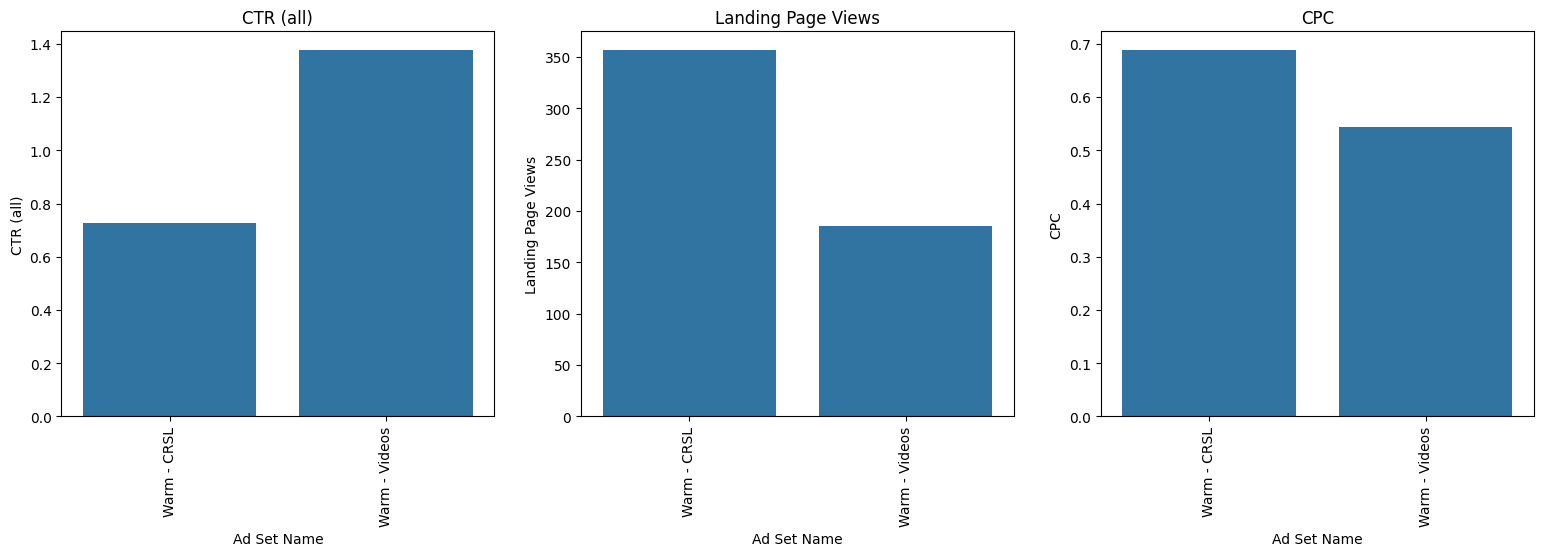

In [ ]:
mid_funnel_metrics(df_warm)

<Axes: xlabel='Ad Set Name', ylabel='Link Clicks'>

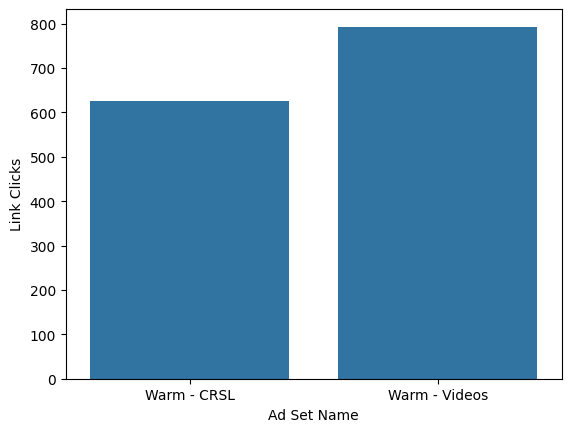

In [ ]:
sns.barplot(x='Ad Set Name', y='Link Clicks', data=df_warm)

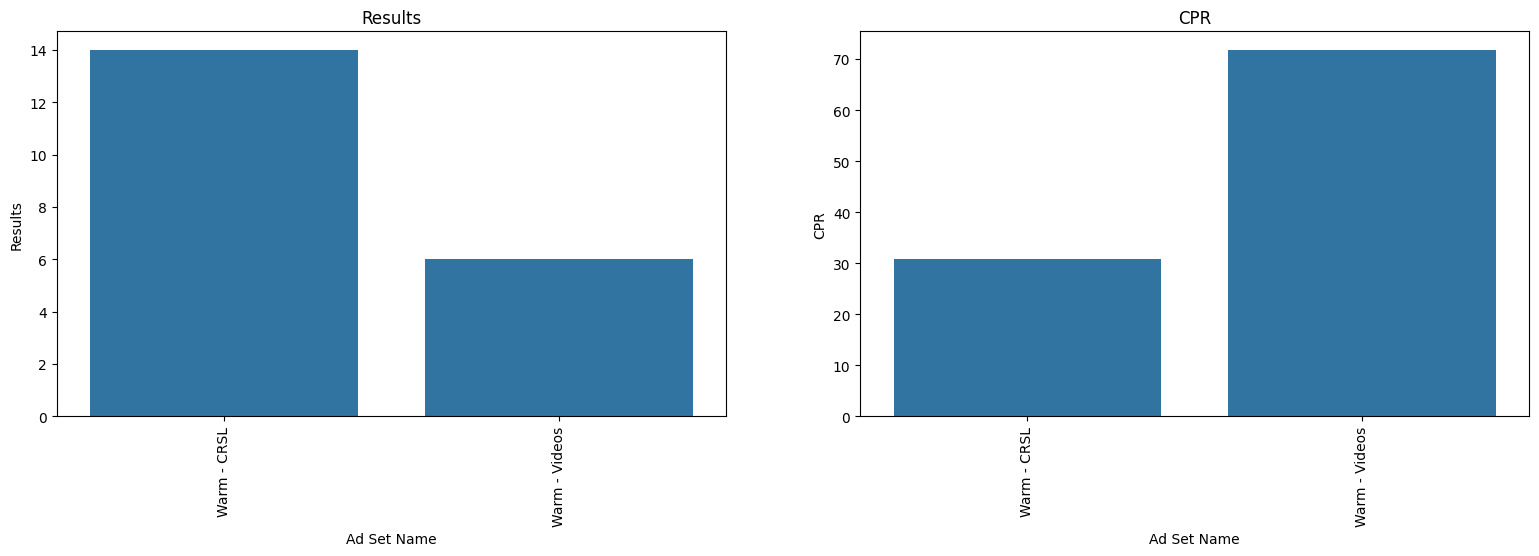

In [ ]:
bottom_funnel_metrics(df_warm)

Cold

In [ ]:
df_cold = df[df['Category']=='Cold']
df_cold = df_cold.reset_index()

In [ ]:
def all_cold_adsets(df, metrics, ad_set_types=['Lookalike Audience','Detailed Targeting']):

    fig, axes = plt.subplots(nrows=len(metrics), ncols=len(ad_set_types), figsize=(12,11), sharey='row')

    for i, metric in enumerate(metrics):
        for j, ad_set_type in enumerate(ad_set_types):
            filtered_df = df[df['Subcategory']==ad_set_type]
            ax = axes[i,j]
            sns.barplot(x='Ad Set Name', y=metric, data=filtered_df, ax=ax)
            ax.set_title(f'{metric}-{ad_set_type}')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    plt.tight_layout()
    plt.show()

/tmp/ipython-input-208372446.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-208372446.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-208372446.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-208372446.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-208372446.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

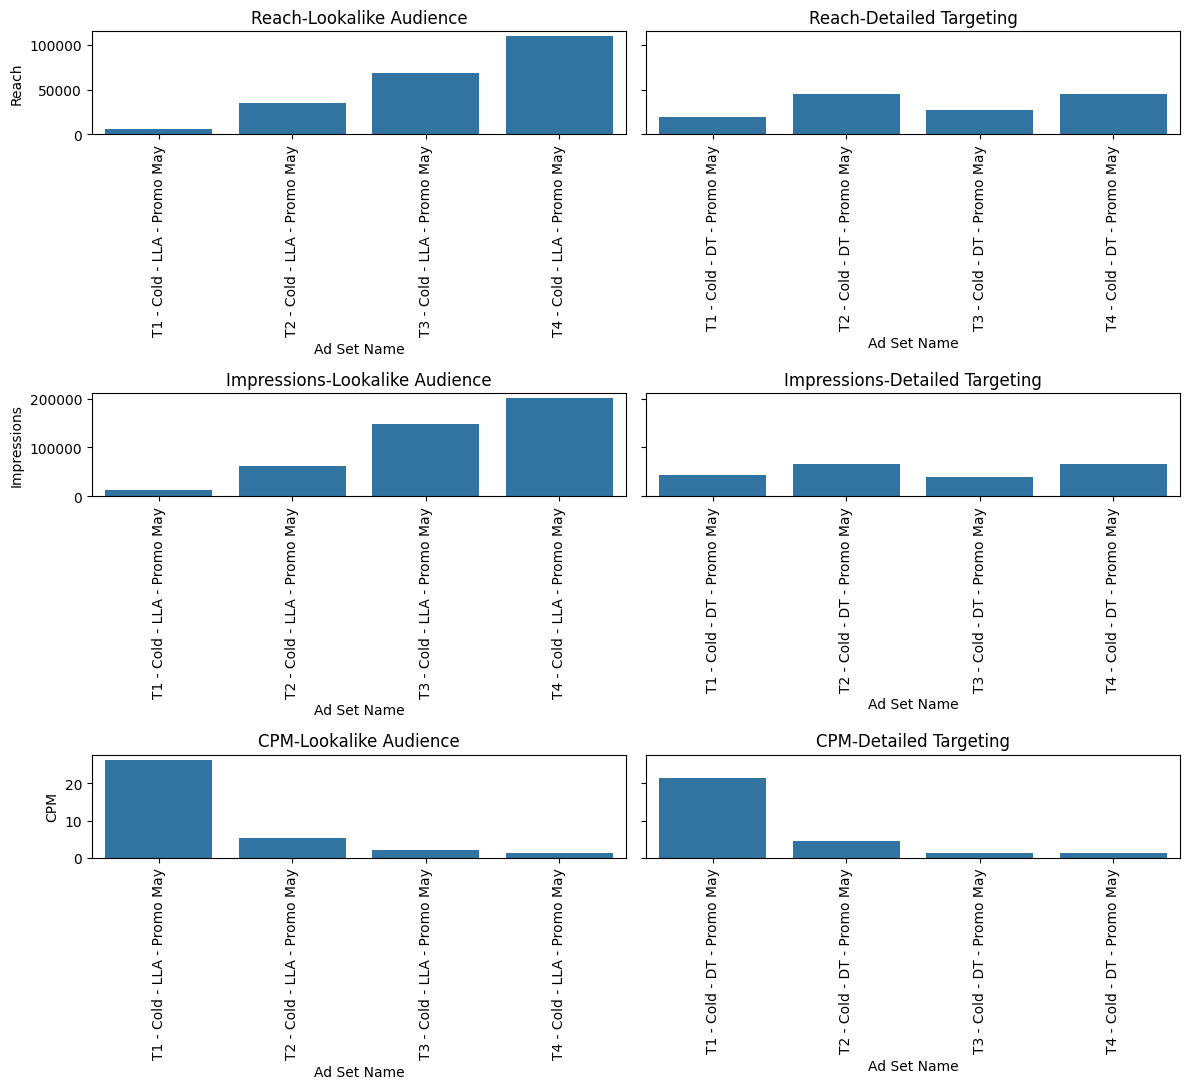

In [ ]:
top_funnel_metrics = ['Reach', 'Impressions', 'CPM']
all_cold_adsets(df_cold, top_funnel_metrics)

Mid-Funnel Metrics

/tmp/ipython-input-208372446.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-208372446.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-208372446.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-208372446.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-208372446.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

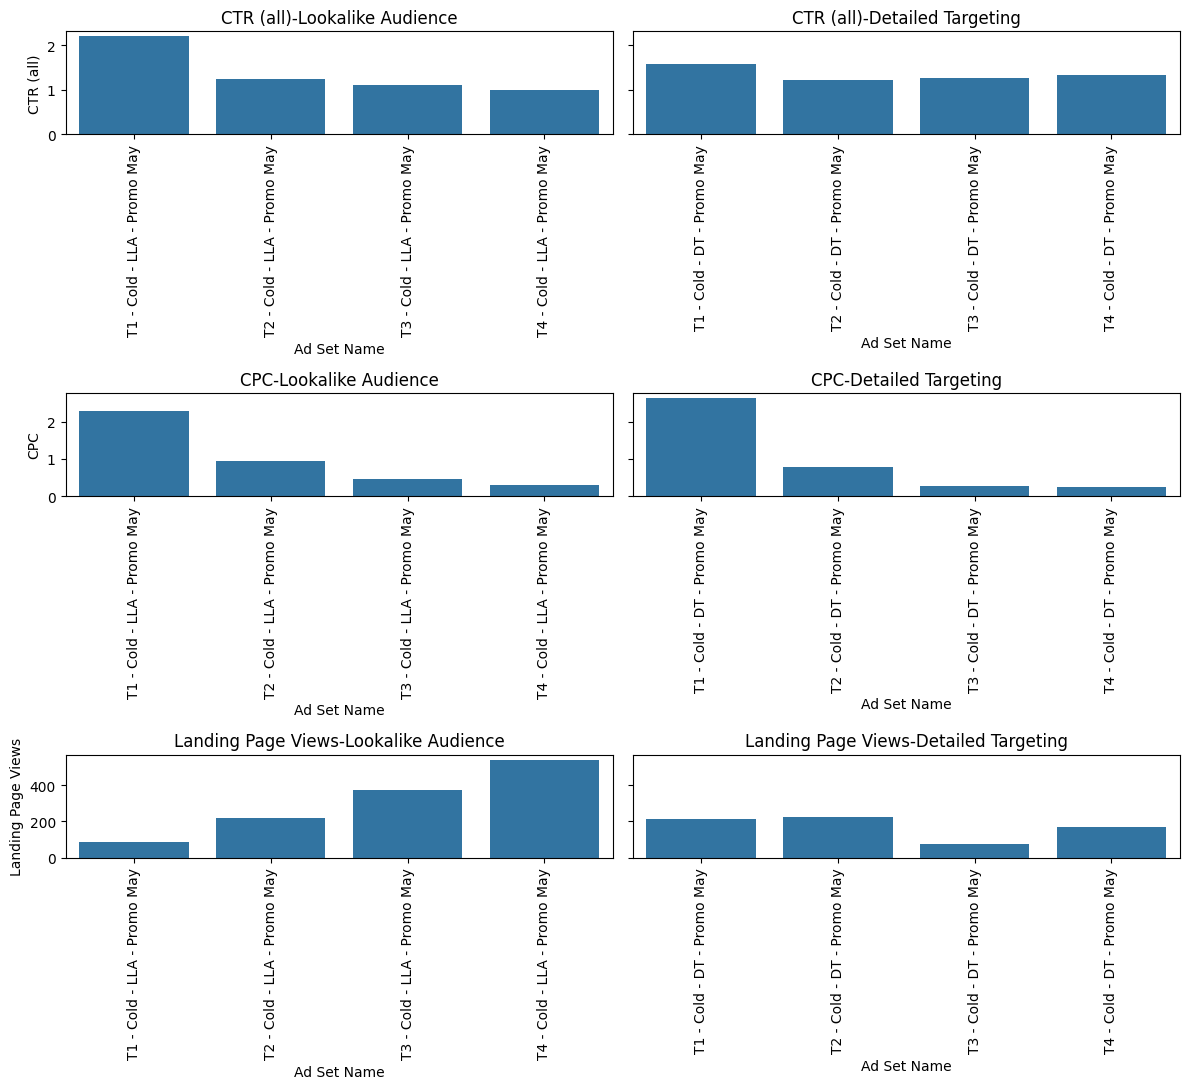

In [ ]:
mid_funnel_metrics = ['CTR (all)','CPC','Landing Page Views']
all_cold_adsets(df_cold, mid_funnel_metrics)

Bottom-Funnel Metrics

/tmp/ipython-input-208372446.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-208372446.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-208372446.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-208372446.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipython-input-208372446.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

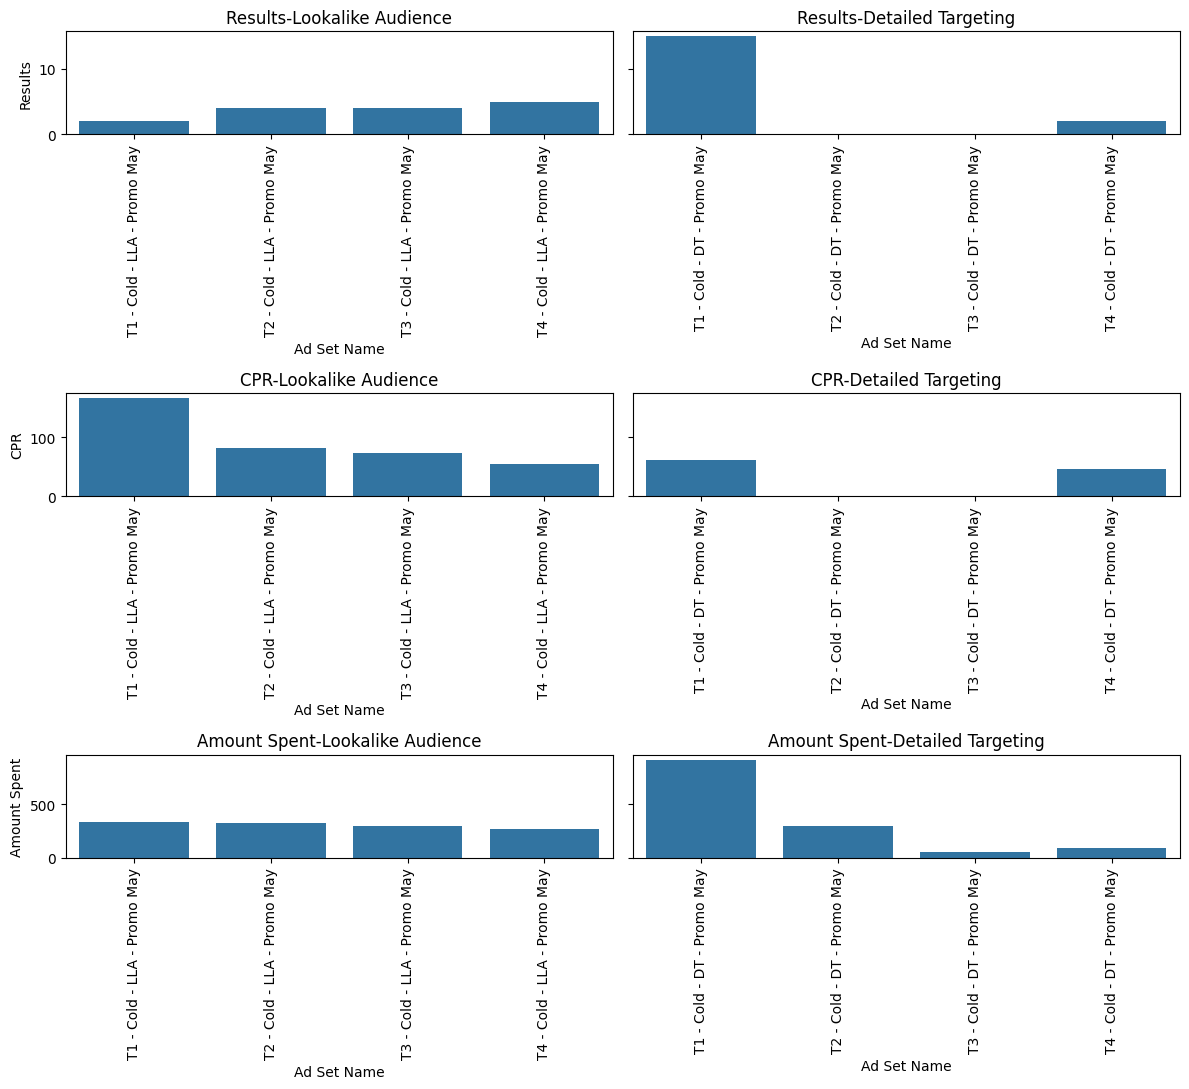

In [ ]:
bottom_funnel_metrics = ['Results','CPR','Amount Spent']
all_cold_adsets(df_cold, bottom_funnel_metrics)